#### Objective: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [19]:
#breakline definition
def breakline():
  print('\n','\n')

In [6]:
#Initialization: reading the csv file
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [7]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [9]:
df.shape

(2443651, 9)

In [11]:
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [12]:
# Retrieving the unique data types present in the dataframe columns
list(set(df.dtypes.tolist()))

[dtype('bool'), dtype('int64'), dtype('float64'), dtype('O')]

In [13]:
# Extracting column names with numerical data types from the dataframe
df.select_dtypes("number").columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [14]:
# Counting and sorting the unique values for each numerical column in descending order
df.select_dtypes("number").nunique().sort_values(ascending=False)

uid                  2443651
price                  82916
reviews                19446
stars                     42
boughtInLastMonth         25
dtype: int64

In [15]:
# Checking for missing data
df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

### Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?



1. Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?

In [21]:
#Let's focus on the category column

# Frequency table for 'category'
frequency_table = df['category'].value_counts()

# Calculating the proportion of each unique value in the 'MSZoning'
proportion_table = df['category'].value_counts(normalize=True)

In [22]:
frequency_table,

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Alexa Built-In Devices                       107
 Motorbike Chassis                            107
 Plugs                                        107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,)

In [23]:
proportion_table


category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
                                            ...   
Alexa Built-In Devices                    0.000044
Motorbike Chassis                         0.000044
Plugs                                     0.000044
Smart Home Security & Lighting            0.000043
Smart Speakers                            0.000022
Name: proportion, Length: 296, dtype: float64

In [24]:
# Get the top 5 most listed product categories
top_5_categories = frequency_table.head(5)

print("Top 5 most listed product categories:")
print(top_5_categories)

Top 5 most listed product categories:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


2. Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

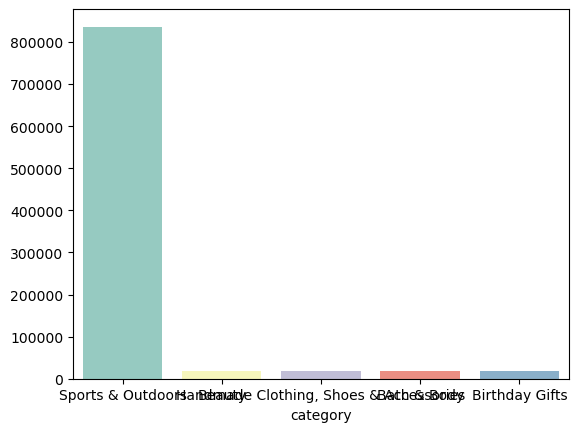

In [26]:
# Display the distribution of products across different categories using a bar chart.

sns.barplot(x=top_5_categories.index, y=top_5_categories.values, palette="Set3");

<Axes: xlabel='category'>

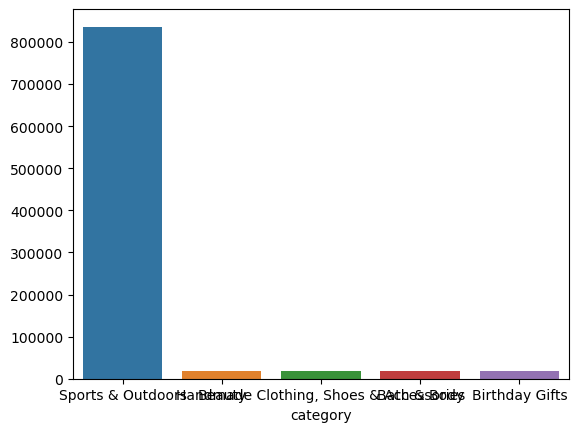

In [28]:
sns.barplot(x=top_5_categories.index, y=top_5_categories.values)

Text(0.5, 1.0, 'Top 5 Product Categories')

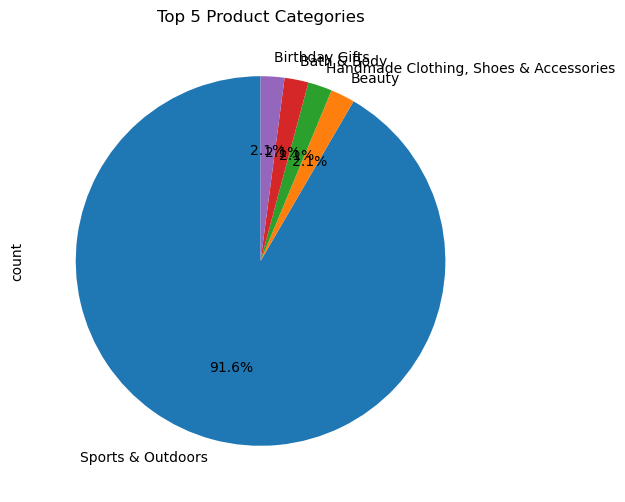

In [39]:
plt.figure(figsize=(8, 6))
top_5_categories.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Product Categories')

### Part 2: Delving into Product Pricing
#### Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. Measures of Centrality:

Calculate the mean, median, and mode for the price of products.

What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [40]:
#Calculate the mean, median, and mode for the price of products.
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [82]:
column_list = df.columns.tolist()
print(column_list)

['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller', 'boughtInLastMonth', 'category']


In [41]:
df['price'].mean()

89.24380943923663

In [42]:
df['price'].median()

19.09

In [46]:
# Showing the mode
df['price'].mode()

0    9.99
Name: price, dtype: float64

In [45]:
# Obtaining the mode a different way with value_counts()
df['price'].value_counts()

price
9.99       48922
12.99      38823
8.99       34058
7.99       33632
14.99      32570
           ...  
2398.99        1
1453.08        1
1785.63        1
1347.36        1
317.34         1
Name: count, Length: 82916, dtype: int64

Observations:

Most common price: $9.99

Median price:  $19.09

Average price: $89.24

--> big variations: expensive articles are bought on amazon, explaining such difference between mean, median and mode = Sk < 0

 2. Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.

How varied are the product prices? Are there any indicators of a significant spread in prices?

In [47]:
# [test: forget about this cell]

rounded_df = df.round(2)
description_dispersion = rounded_df.describe()
display(description_dispersion)

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [60]:
std_dev_price = df['price'].var()
std_dev_price

119445.48532256528

In [59]:
variance_price = df['price'].std()
variance_price

345.60886175352226

In [62]:
max_price = df['price'].max()
print(max_price)

min_price = print(df['price'].min())
print(min_price)

100000.0
0.0
None


In [53]:
#calculating the range
price_range = df['price'].max() - df['price'].min()
print("Range of column:", price_range)

Range of column: 100000.0


Text(0, 0.5, 'Values')

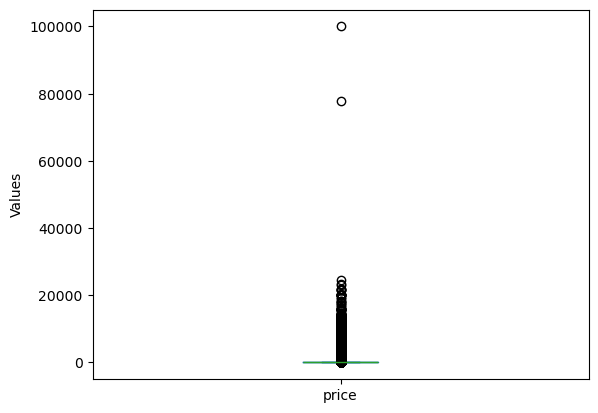

In [56]:
df['price'].plot.box()
plt.ylabel('Values')

In [58]:
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])
quantiles_price

0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

In [76]:
print(f'variance_price: ',{variance_price})
print(f'std_dev_price: ', {std_dev_price}) 
print(f'min_price: ',{min_price})
print(f'max_price:',{max_price} )
print(f'price_range: ',{price_range})
display(quantiles_price)

variance_price:  {345.60886175352226}
std_dev_price:  {119445.48532256528}
min_price:  {None}
max_price: {100000.0}
price_range:  {100000.0}


0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64

std variation and variance are high !
We may expect Sku > 0 = a big kurtosis

3. Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..

Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [77]:
skewness_price = df['price'].skew()
kurtosis_price = df['price'].kurtosis()

skewness_price, kurtosis_price

(27.492977566280338, 4241.616412866518)

d:\Programmes\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

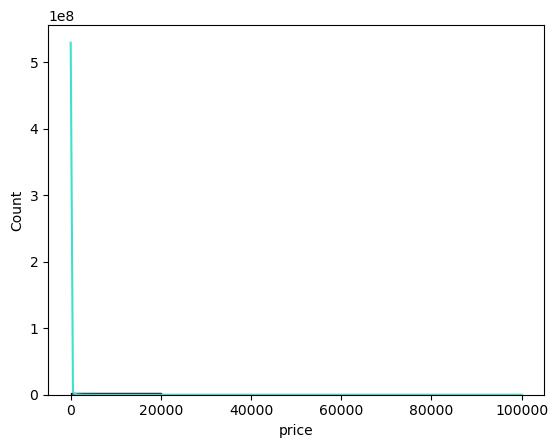

In [80]:
# Plotting a histogram for the 'price' column of the  dataframe
sns.histplot(df['price'], kde=True, bins=5, color="turquoise")

(0.0, 100.0)

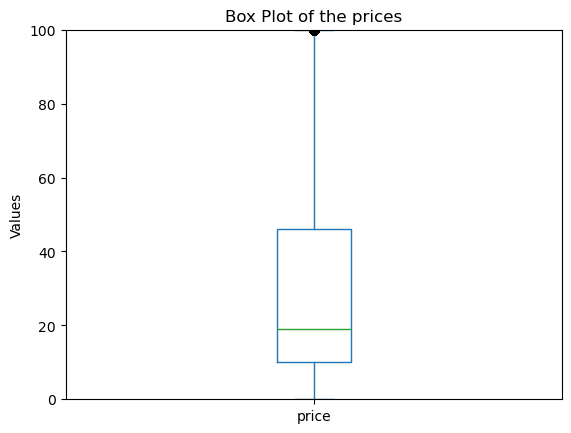

In [81]:
# Making a "readable" box plot

df['price'].plot.box()
plt.ylabel('Values')
plt.title('Box Plot of the prices')
plt.ylim(0, 100)

### Part 3: Unpacking Product Ratings
#### Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.

How do customers generally rate products? Is there a common trend?

In [84]:
mean_dev_rating = df['stars'].mean()
mean_dev_rating

2.152836472966065

In [85]:
median_dev_rating = df['stars'].median()
median_dev_rating

0.0

In [86]:
mode_dev_rating = df['stars'].mode()
mode_dev_rating

0    0.0
Name: stars, dtype: float64

In [88]:
# Obtaining the mode a different way with value_counts()
df['stars'].value_counts()

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64

Median and mode seem to say that 0 star(s) is the main rating

4.81743402976196

2. Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.

Are the ratings consistent, or is there a wide variation in customer feedback?
Shape of the Distribution:

In [91]:
std_dev_rating = df['stars'].std()
std_dev_rating

2.1948653785054697

In [92]:
variance_rating = df['stars'].var()
variance_rating

4.81743402976196

In [94]:
#calculating the range
rating_range = df['stars'].max() - df['stars'].min()
print("Range of column:", rating_range)

Range of column: 5.0


In [96]:
quantiles_rating = df['stars'].quantile([0.25, 0.5, 0.75])
quantiles_rating

0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64

In [97]:
print(f'variance_price: ',{variance_rating})
print(f'std_dev_rating: ', {std_dev_rating}) 
print(f'rating_range: ',{rating_range})
display(quantiles_rating)

variance_price:  {4.81743402976196}
std_dev_rating:  {2.1948653785054697}
rating_range:  {5.0}


0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64

3. Calculate the skewness and kurtosis for the rating column.

Are the ratings normally distributed, or do they lean towards higher or lower values?

In [98]:
skewness_price = df['stars'].skew()
kurtosis_price = df['stars'].kurtosis()

skewness_price, kurtosis_price

(0.08120735761080985, -1.9260061280432985)


4. Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common ?

d:\Programmes\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stars', ylabel='Count'>

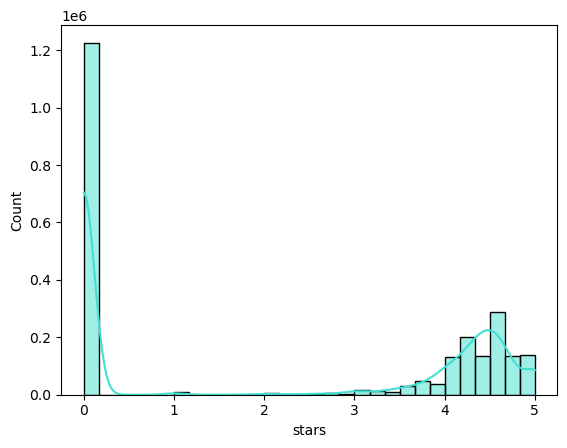

In [100]:
sns.histplot(df['stars'], kde=True, bins=30, color="turquoise")

Is there a specific rating that is more common?
--> Yes definitley: - majotity of 0 star   
- almost no rating between 1 and 4 
- around 4.5 stars for the rest

<Axes: >

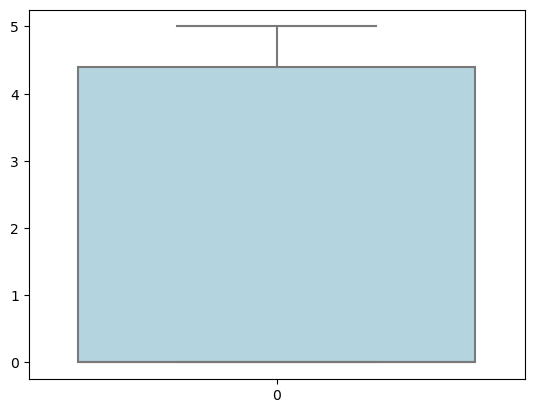

In [101]:
sns.boxplot(data = df['stars'], color="lightblue")

My opinion: There's a problem with the 0 star rating - obviously rating not achieved automatically rate the products to 0...